In [4]:
import tensorflow as tf
import os
print(tf.__version__)

1.14.0


## 確認標籤是否有正確顯示出來
資料形式為以資料夾命名標籤類別，並將圖片資料存進資料夾中

In [5]:
print("本次測試標籤為:",os.listdir('C:/Users/danie/flowers'))

本次測試標籤為: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [6]:
import cv2                  
import numpy as np  
from tqdm import tqdm               
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


X=[]
Z=[]
IMG_SIZE=224
FLOWER_DAISY_DIR='C:/Users/danie/flowers/daisy'
FLOWER_SUNFLOWER_DIR='C:/Users/danie/flowers/sunflower'
FLOWER_TULIP_DIR='C:/Users/danie/flowers/tulip'
FLOWER_DANDI_DIR='C:/Users/danie/flowers/dandelion'
FLOWER_ROSE_DIR='C:/Users/danie/flowers/rose'

def assign_label(img,flower_type):
    return flower_type

def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [7]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print("Daisy:",len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 769/769 [00:05<00:00, 147.62it/s]

Daisy: 769


In [8]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print("Sunflower:",len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 734/734 [00:05<00:00, 134.07it/s]

Sunflower: 1503


In [9]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print("Tulip:",len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 984/984 [00:06<00:00, 142.48it/s]

Tulip: 2487


In [10]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print("Rose:",len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 784/784 [00:05<00:00, 146.73it/s]

Rose: 3271


In [11]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print("Dandelion:",len(X))

100%|█████████████████████████████████████████████████████████████████████████████| 1052/1052 [00:07<00:00, 137.82it/s]

Dandelion: 4323


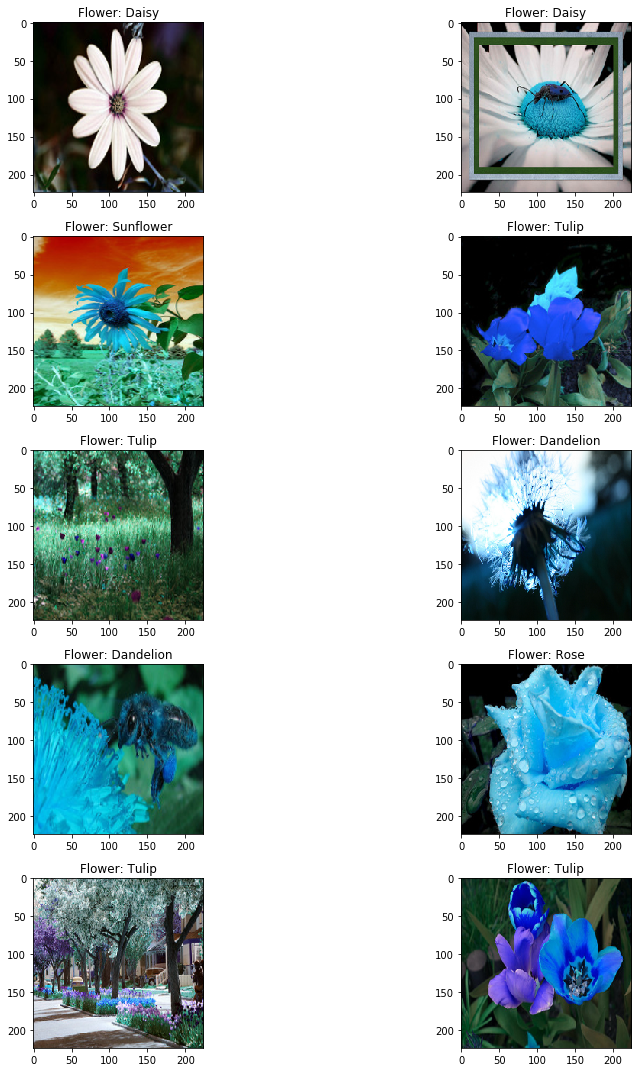

In [13]:
import matplotlib.pyplot as plt
import random as rn
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

In [17]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>


In [18]:
X=X/255

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

In [22]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.utils import np_utils
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))


model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 96)       

In [23]:
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [24]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [28]:
History = model.fit(x_train,
                    y_train, 
                    batch_size=20,
                    epochs = 10, 
                    validation_data = (x_test,y_test),
                    verbose = 1,
                    #callbacks = red_lr
                   )

Train on 3242 samples, validate on 1081 samples
Epoch 1/10
3242/3242 [==============================] - 20s 6ms/sample - loss: 1.3169 - acc: 0.4377 - val_loss: 1.0855 - val_acc: 0.5615
Epoch 2/10
3242/3242 [==============================] - 19s 6ms/sample - loss: 1.0262 - acc: 0.5910 - val_loss: 0.9683 - val_acc: 0.6161
Epoch 3/10
3242/3242 [==============================] - 18s 6ms/sample - loss: 0.8734 - acc: 0.6678 - val_loss: 0.9812 - val_acc: 0.6383
Epoch 4/10
3242/3242 [==============================] - 18s 6ms/sample - loss: 0.7239 - acc: 0.7304 - val_loss: 0.9805 - val_acc: 0.6494
Epoch 5/10
3242/3242 [==============================] - 18s 6ms/sample - loss: 0.5176 - acc: 0.8091 - val_loss: 1.0303 - val_acc: 0.6485
Epoch 6/10
3242/3242 [==============================] - 18s 6ms/sample - loss: 0.3354 - acc: 0.8831 - val_loss: 1.3695 - val_acc: 0.6475
Epoch 7/10
3242/3242 [==============================] - 18s 6ms/sample - loss: 0.2050 - acc: 0.9300 - val_loss: 1.7195 - val_acc: 

In [35]:
import pandas as pd
def plot_learning_curves(History):
    pd.DataFrame(History.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

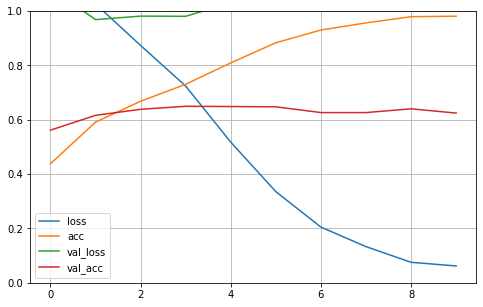

In [36]:
plot_learning_curves(History)